In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [180]:
class Dense:
    def __init__(self,input_size,output_size):
        self.weights = np.random.randn(output_size,input_size)
        self.bias = np.random.randn(output_size,1)
        
    def Forward(self,input_data):
        self.inputs = input_data
        return np.dot(self.weights,input_data) + self.bias
        
    def Backward(self,grad_output,lr):
        weight_grad = np.dot(grad_output,self.inputs.T)
        input_grad = np.dot(self.weights.T,grad_output)
        bias_grad = np.sum(grad_output, axis = 1, keepdims = True)
        
        self.weights -= lr * weight_grad 
        self.bias -= lr * bias_grad
        
        return input_grad
    

In [181]:
class Sigmoid:
    def Forward(self,input_data):
        self.outputs = 1 / (1 + np.exp(-input_data))
        return self.outputs
    def Backward(self,grad_output):
        grad_sigmoid = self.outputs * (1 - self.outputs)
        return grad_sigmoid * grad_output

In [182]:
class NN:
    def __init__(self,input_size,hidden1,hidden2,output_size):
        self.dense1 = Dense(input_size,hidden1)
        self.sigmoid1 = Sigmoid()
        self.dense2 = Dense(hidden1,hidden2)
        self.sigmoid2 = Sigmoid()
        self.dense3 = Dense(hidden2,output_size)
        self.sigmoid3 = Sigmoid()
        
    def Forward(self,input_data):
        z1 = self.dense1.Forward(input_data)
        a1 = self.sigmoid1.Forward(z1)
        z2 = self.dense2.Forward(a1)
        a2 = self.sigmoid2.Forward(z2)
        z3 = self.dense3.Forward(a2)
        a3 = self.sigmoid3.Forward(z3)
        
        return a3
        
    def Backward(self,grad_output,lr):
        op1 = self.sigmoid3.Backward(grad_output)   
        op2 = self.dense3.Backward(op1,lr)
        op3 = self.sigmoid2.Backward(op2)
        op4 = self.dense2.Backward(op3,lr)
        op5 = self.sigmoid1.Backward(op4)
        op6 = self.dense1.Backward(op5,lr)
        
        return op6

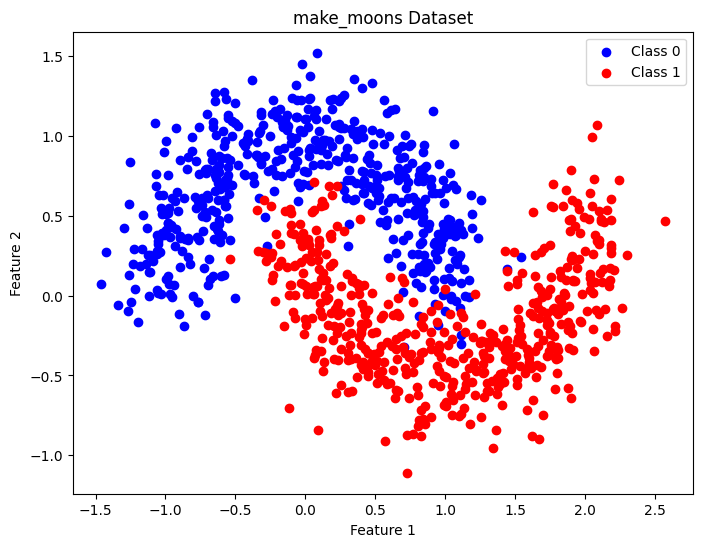

In [183]:
from sklearn.datasets import make_moons
# import matplotlib.pyplot as plt

# Create a dataset with 1000 samples, a noise factor of 0.2
X, y = make_moons(n_samples=1000, noise=0.2)

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
plt.title('make_moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [184]:
X.shape

(1000, 2)

In [185]:
y.shape

(1000,)

In [186]:
y

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,

In [187]:
input_size = 2
output_size = 1
hidden_size1 = 4
hidden_size2 = 4
learning_rate = 0.01
y_pred = []
nn = NN(input_size,hidden_size1,hidden_size2,output_size)
epochs = 10000
for epoch in range(epochs):
    total_loss = 0
    for i in range(len(X)):
        input_data = X[i].reshape(-1,1)
        output_data = y[i]

        outputs = nn.Forward(input_data)
        target = output_data

        loss = 0.5 * np.sum((outputs - output_data)**2)
        total_loss += loss
        grad_loss = outputs - target

        nn.Backward(grad_loss,learning_rate)

    if epoch % 100 == 0:
        print(f'{epoch} th loss is {total_loss/len(input_data)}')

# Now I will call NN Forward to get my output on the 
# basis of updated weights

for i in range(len(X)):
    outputs = nn.Forward(X[i].reshape(-1,1))
    if outputs >= 0.9 :
        outputs = 1
    else:
        outputs = 0
    y_pred.append(outputs)
    print(f'input is: {X[i].reshape(-1,1)} and output is: {outputs}')

0 th loss is 64.30516918250026
100 th loss is 24.30409173535249
200 th loss is 24.079577201965588
300 th loss is 23.944725942826462
400 th loss is 23.85792971026174
500 th loss is 23.79265338964153
600 th loss is 23.74012363016786
700 th loss is 23.695837520372688
800 th loss is 23.657171730960794
900 th loss is 23.62253858569722
1000 th loss is 23.590954664555394
1100 th loss is 23.56180524885444
1200 th loss is 23.53470885857788
1300 th loss is 23.509433229754105
1400 th loss is 23.485839009818797
1500 th loss is 23.463840570958677
1600 th loss is 23.443379185295505
1700 th loss is 23.424405754515526
1800 th loss is 23.406870761268028
1900 th loss is 23.39071933528367
2000 th loss is 23.37588965770763
2100 th loss is 23.362313340023498
2200 th loss is 23.34991681721989
2300 th loss is 23.338623130889836
2400 th loss is 23.32835372961102
2500 th loss is 23.319030087555415
2600 th loss is 23.310575053431265
2700 th loss is 23.302913907544735
2800 th loss is 23.295975139747444
2900 th l

In [188]:
# y
y_pred = np.array(y_pred)

In [192]:
# X
cnt = 0
for i in range(len(y_pred)):
    if y_pred[i] == y[i]:
        cnt += 1
accuracy = (cnt / len(y_pred)) * 100
print(f'accuracy is: {accuracy}%')

accuracy is: 95.5%
